Terakhir, kita mempelajari cara mendapatkan respons impuls dari filter rendah ideal, yang dikenal sebagai fungsi sinc. Tantangannya dengan respons impuls ini adalah bahwa ia tidak kausal, artinya dimulai dari waktu negatif, dan kita tidak dapat membuatnya kausal karena tidak mungkin menambahkan tundaan tak terbatas.


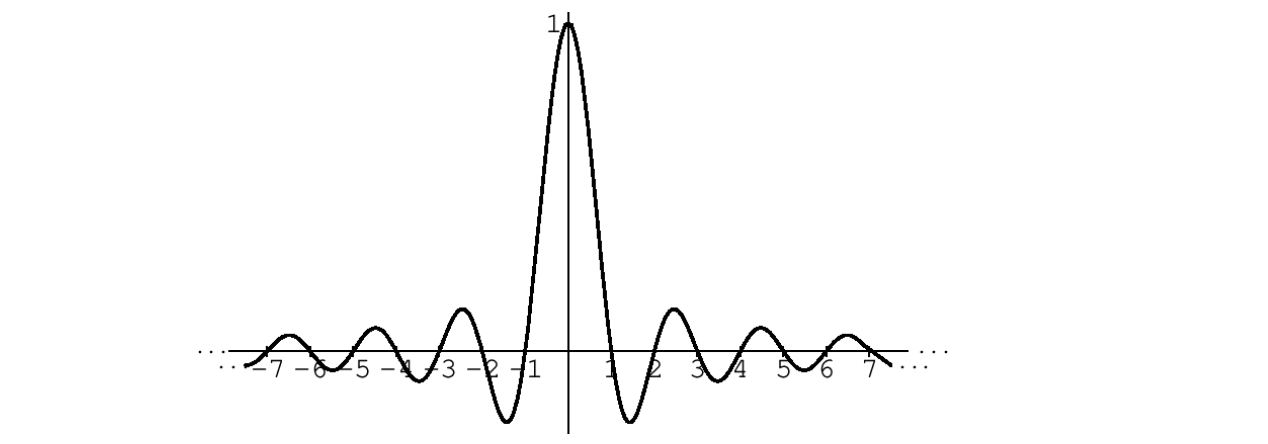

Mari kita asumsikan kita ingin memiliki filter rendah FIR yang kausal, yang berarti respons impulsnya dimulai pada waktu 0 dan hanya berlangsung pada sejumlah sampel berhingga, n=0,...,L-1, dengan panjang L. Namun, karena filter FIR tidak memiliki analogi dalam domain analog dan selalu memiliki respon impuls yang terbatas, kita harus merancang filter ini agar sesuai dengan filter ideal dalam beberapa aspek.

Misalnya, kita ingin merancang filter anti-aliasing untuk mengurangi laju sampel dari CD (dengan laju sampel 44,1 kHz) menjadi laju sampel 22 kHz. Untuk menghindari aliasing, kita perlu menyaring sinyal dengan filter rendah yang memiliki pita lintas dari 0 hingga 9 kHz dan pita henti dari 11 kHz hingga maksimum (22,05 kHz dalam contoh ini). Karena tidak ada filter yang ideal, kita perlu menyertakan pita transisi dari 9 kHz hingga 11 kHz, di mana filter dapat bertransisi dari pita lintas ke pita henti dengan attenuasi intermediat.

Aliasing adalah masalah yang jelas terdengar, jadi kita ingin filter memiliki attenuasi minimal 60 dB di atas 11 kHz. Pita lintas dapat memiliki beberapa ripple pada respons frekuensinya, misalnya ± 2 dB. Rentang frekuensi dari 9 kHz hingga 11 kHz adalah pita transisi, tempat filter harus membangun attenuasinya dari 0 hingga 60 dB, untuk memastikan bahwa attenuasi sudah mencapai 60 dB pada 11 kHz.

Salah satu pendekatan untuk merancang filter seperti ini adalah dengan mendefinisikan kemiripan sebagai kesalahan kuadrat antara respons frekuensi filter FIR kita dengan respons frekuensi ideal. Tujuannya adalah meminimalkan kesalahan kuadrat ini. Jika respons frekuensi yang diinginkan adalah Hd(ω), dan respons frekuensi filter FIR kausal kita adalah H(ω), maka kesalahan kuadratnya adalah:


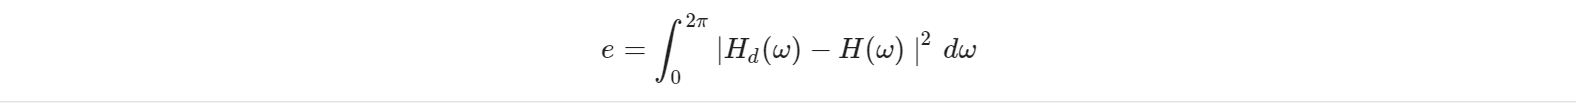

Kita berusaha untuk meminimalkan kesalahan e sebisa mungkin. Perlu dicatat bahwa dalam konteks ini, kami membutuhkan integrasi karena sinyal dalam domain frekuensi adalah kontinu, sementara sinyal dalam domain waktu tidak periodik. Oleh karena itu, Transformasi Fourier Diskrit tidak dapat diterapkan, karena dibatasi pada sinyal periodik dengan periode yang berhingga. Sebaliknya, Transformasi Fourier Waktu Diskrit sesuai untuk sinyal waktu diskrit dengan periode yang tak berhingga.

Tujuan kami adalah untuk meminimalkan kesalahan kuadrat e melalui pendekatan dengan filter FIR. Meskipun tidak dapat menyelesaikan masalah ini dalam domain frekuensi, formulasi setara dapat diselesaikan dalam domain waktu.

Untuk melakukan ini, kami mengandalkan Teorema Parseval, yang menyatakan bahwa daya sinyal, yang merupakan jumlah kuadrat magnitudenya, sama di domain waktu dan di domain frekuensi. Prinsip ini berlaku baik untuk Transformasi Fourier Waktu Diskrit maupun untuk DFT.

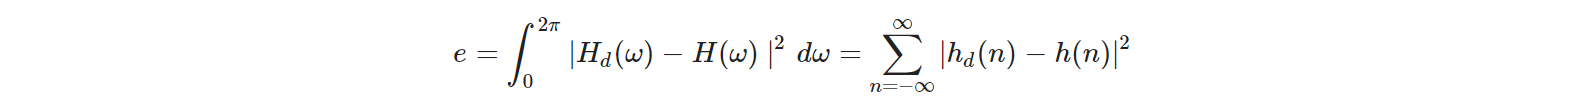

Keindahan di sini adalah sekarang kita mendapatkan sebuah jumlah, yang sekarang dapat kita hitung lebih mudah (ingat: kita ingin mendapatkan h(n)).

Untuk filter rendah ideal kita, hd(n) adalah fungsi sinc. Untuk mendapatkan filter kausal, kita sudah memperbolehkan pergeseran waktu nd untuk respon impuls ideal (menggunakan filter FIR kita h(n) membuat kausalitas menjadi mungkin). Memasukkan ini ke dalam persamaan di atas menghasilkan:

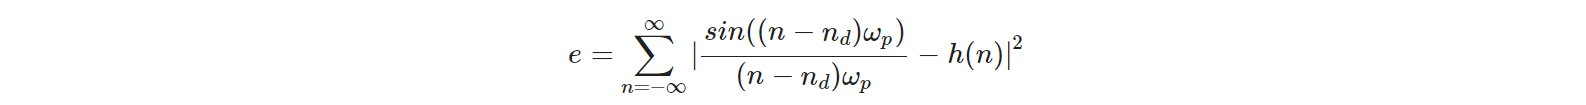

Bagaimana cara kita memilih h(n) dan tundaan nd agar kesalahan kuadrat minimum e dapat diperoleh untuk panjang L yang telah ditentukan dari h(n)?

Dengan panjang L yang diberikan, kita perlu menentukan L koefisien h(n) dan parameter tunda nd.

Untuk membuat solusinya lebih mudah dipahami, kita dapat membagi jumlahnya menjadi dua bagian: satu untuk rentang h(n) dan satu untuk sisa:

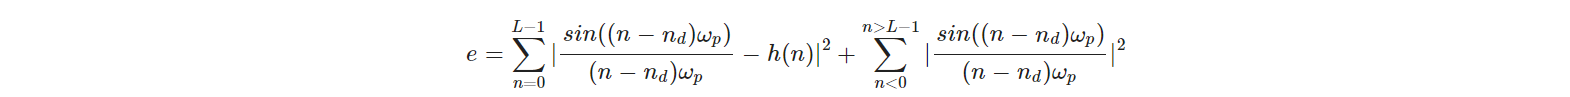

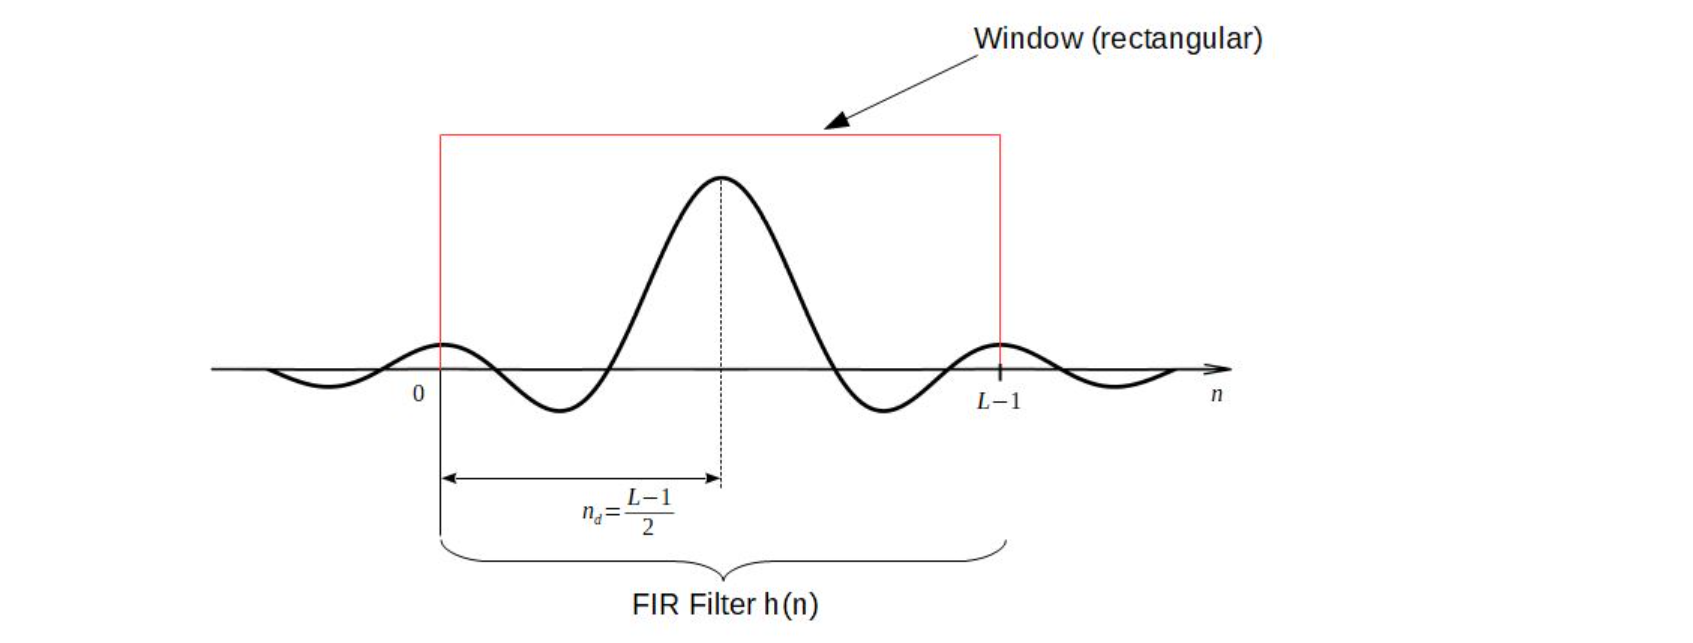

Fungsi jendela yang dibayangkan akan lebih menarik jika kita mengubah nilai dari 1 menjadi nilai lain. Kita bisa melihat bahwa Filter FIR dapat dianggap sebagai hasil perkalian antara fungsi sinc dan fungsi jendela persegi.

Perlu diperhatikan bahwa jika kita hanya menggunakan bagian terbatas dari fungsi Sinc sebagai filter kita, maka secara implisit kita sudah menerapkan jendela persegi. Oleh karena itu, tidak perlu menerapkannya secara eksplisit lagi.

Dengan melakukan perkalian fungsi jendela persegi dengan respon impuls ideal dalam domain waktu, kita sebenarnya melakukan konvolusi antara DTFT (Discrete Time Fourier Transform) dari fungsi jendela persegi dengan respon frekuensi ideal dalam domain frekuensi. Dengan cara ini, kita dapat melihat hasilnya dalam domain frekuensi. Idealnya, DTFT dari jendela ini harus menjadi impuls pada frekuensi nol, sehingga konvolusi tidak akan mengubah respon frekuensi ideal. Namun, hal ini berarti jendela tersebut harus tak berujung panjangnya dalam domain waktu. Kita menggunakan jendela persegi berhingga dalam domain waktu yang, saat diubah ke domain frekuensi, menjadi fungsi Sinc yang berbeda dari pulse pada frekuensi non-zero.

Penting untuk dicatat bahwa semakin panjang jendela dalam domain waktu, semakin sempit pula fungsi Sinc-nya dalam domain frekuensi, dan semakin mirip dengan sebuah impuls. Oleh karena itu, untuk mencapai filter yang lebih baik, kita memerlukan jendela yang lebih panjang!

Mari kita lihat implementasinya dalam iPython, dengan menggunakan jendela.

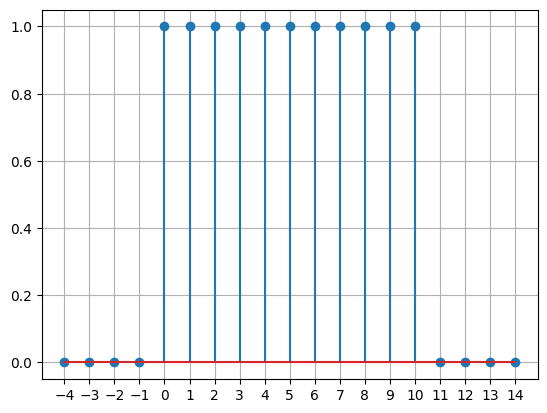

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L=11
h = np.concatenate((np.zeros(4),np.ones(L),np.zeros(4)),axis=0)
plt.figure()
plt.stem(np.arange(-4, L+4, step=1), h)
plt.xticks(np.arange(-4, L+4, step=1))
plt.grid();

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), Checkbox(value=False, description=…

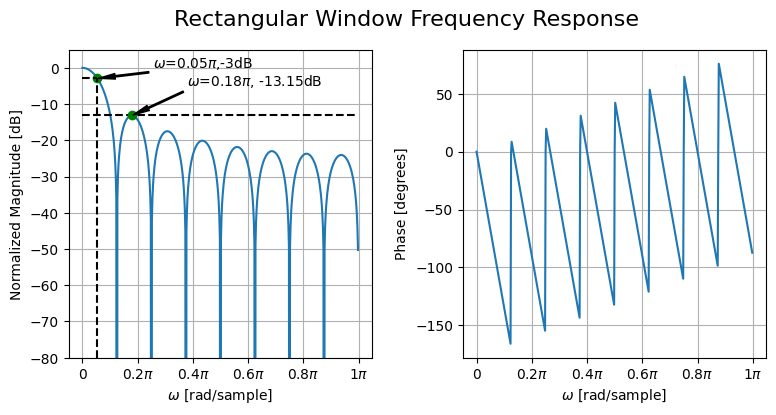

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.signal import argrelextrema
import scipy.signal as signal

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
fig.suptitle('Rectangular Window Frequency Response', fontsize=16)
plt.subplots_adjust(wspace=0.3)

@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16), unwrap=False)
def plot_recWindow_H(L=16, unwrap=False):
    h = np.concatenate((np.ones(L), np.zeros(4)), axis=0)
    omega, H = signal.freqz(h[:-4], worN=512)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB = 20 * np.log10(np.abs(H) / np.abs(H).max())
    p3dB = np.max(H_dB) - 3
    p3dBIndex = np.max(np.where(H_dB >= p3dB))
    wp = omega[p3dBIndex]
    Hp = H_dB[p3dBIndex]
    ax1.clear()
    ax1.plot(omega, H_dB)
    ax1.plot(wp, Hp, 'go')
    ax1.plot((0, wp), (Hp, Hp), 'k--')
    ax1.plot((wp, wp), (-80, Hp), 'k--')
    ax1.set_ylim((-80, H_dB.max() + 5))
    ax1.annotate(r'$\omega$={:.2f}$\pi$,-3dB'.format(wp/np.pi), xy=(wp, Hp), xytext=(wp + 0.2 * np.pi, 0),
                 arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L != 2:
        side_lobe = argrelextrema(np.abs(H), np.greater)[0][0]
        ax1.plot((0, omega[-1]), (H_dB[side_lobe], H_dB[side_lobe]), 'k--')
        ax1.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi, H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(omega[side_lobe] + 0.2 * np.pi, -5),
                     arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax1.plot(omega[side_lobe], H_dB[side_lobe], 'go')

    ax1.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: '{:.0g}$\pi$'.format(val / np.pi) if val != 0 else '0'))
    ax1.xaxis.set_major_locator(MultipleLocator(base=0.2 * np.pi))
    ax1.grid(True)
    ax1.set_xlabel(r'$\omega$ [rad/sample]')
    ax1.set_ylabel(r'Normalized Magnitude [dB]')

    ax2.clear()
    phase = np.angle(H, deg=True)
    if unwrap:
        phase = np.unwrap(phase)
    ax2.plot(omega, phase)
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: '{:.0g}$\pi$'.format(val / np.pi) if val != 0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.2 * np.pi))
    ax2.grid(True)
    ax2.set_xlabel(r'$\omega$ [rad/sample]')
    ax2.set_ylabel(r'Phase [degrees]')


Di sini, kita dapat melihat bahwa jauh dari menjadi impuls pada frekuensi nol, respons frekuensi filter tersebut agak lebar dan attenuasinya tidak terlalu tinggi, sekitar -15 hingga -20 dB. Harapan kita adalah bahwa filter low-pass yang dihasilkan akan mewarisi properti ini melalui konvolusi dalam domain frekuensi.

Lebar "pita lintas" atau lebar lobe utama dari fungsi jendela kita akan menentukan lebar pita transisi dari filter yang dihasilkan, sementara attenuasi pita henti dari jendela akan menentukan attenuasi pita henti yang dihasilkan dari filter tersebut.

Hal ini menunjukkan bahwa fungsi jendela membentuk karakteristik kunci dari filter FIR yang dihasilkan!

Sebagai contoh, ambil filter downsampling kita yang seharusnya mengurangi frekuensi mulai dari 11 kHz, pada laju sampel 44,1 kHz. Kita ingin memiliki attenuasi -60 dB di pita henti. Oleh karena itu, kita mendapatkan frekuensi ternormalisasi untuk awal pita henti kita sebagai ωs.

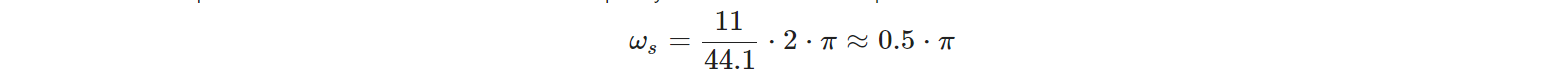

Maka, respons frekuensi yang kita harapkan adalah 1 di antara frekuensi 0 dan ωs (atau lebih tepatnya: di antara −ωs hingga ωs untuk juga mempertimbangkan sumbu frekuensi negatif). Sekarang, kita dapat mengambil invers DTFT dari respons frekuensi ideal yang diinginkan Hd(ω) untuk mendapatkan respons impuls ideal hd(n). Karena pada dasarnya kita mengasumsikan filter yang ideal, kita menetapkan ujung pita lintas ωc identik dengan awal pita henti, ωc=ωs:

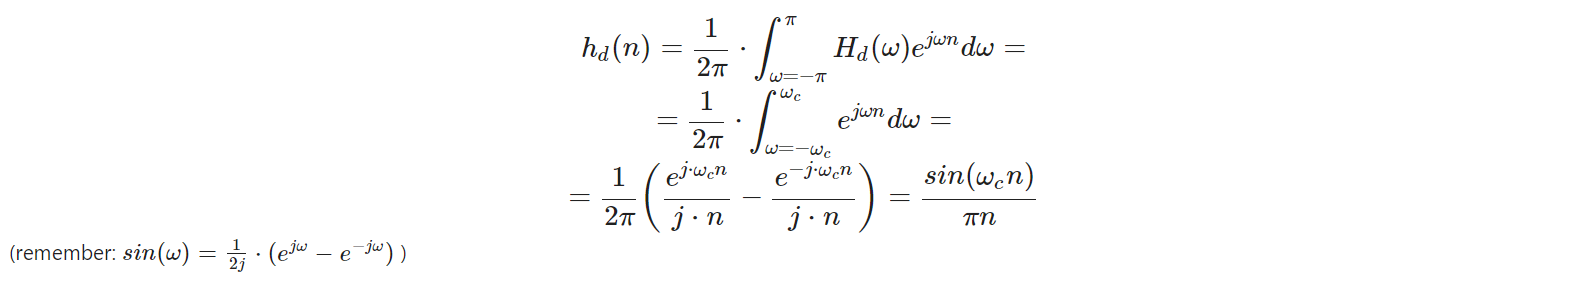

# Pendekatan Filter Rendah Ideal Menggunakan Jendela Persegi dan Delay

Kita telah melihat bahwa respon impuls dari filter rendah ideal adalah:

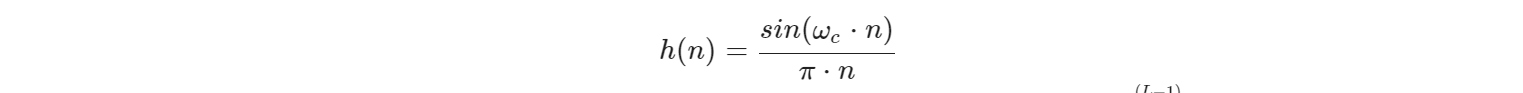

Dengan memotong respon impuls (mengalikan dengan jendela persegi) sehingga memiliki panjang L dan menerapkan tundaan nd=(L−1)/2, kita memiliki:

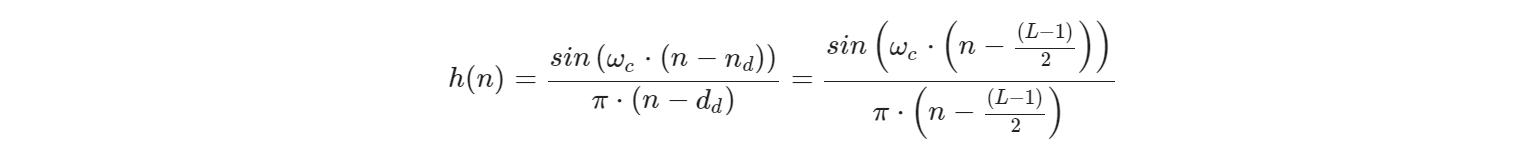

In [3]:
from sympy import sin, symbols, simplify, pi, lambdify, limit

wc_s = symbols('\omega_c')
n_s, L_s = symbols('n L', integer=True)

n_d_s=(L_s-1)/2
h_n_s=sin(wc_s*(n_s-n_d_s))/(pi*(n_s-n_d_s))
h_n_s

sin(\omega_c*(-L/2 + n + 1/2))/(pi*(-L/2 + n + 1/2))

In [4]:

h_0_s = limit(h_n_s,n_s,n_d_s)
h_0_s

\omega_c/pi

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), FloatSlider(value=0.5, description…

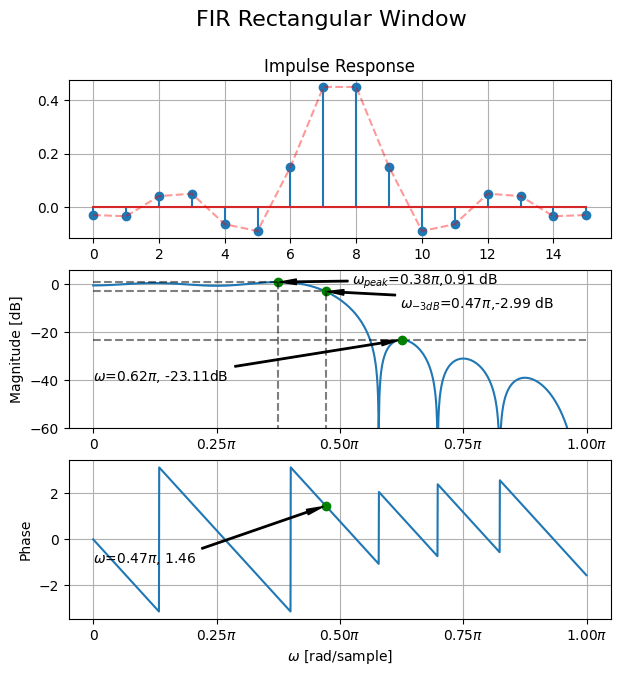

In [5]:
h_n=lambdify((wc_s,n_s,L_s), h_n_s, 'numpy')

fig1, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(7,7))
fig1.suptitle('FIR Rectangular Window', fontsize=16)
plt.subplots_adjust(wspace=0.3)


@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),
          wc=widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.5), unwrap=False)
def plot_h(L=16, wc=0.5,unwrap=False):
    wc=wc*np.pi
    n=np.arange(L)
    n_d=n_d_s.subs(L_s,L).evalf()
    if L%2==0:
        h=h_n(wc,n,L)
    else:
        h=np.ones(L)
        for i in range(L):
            if i==n_d:
                h[i]=wc/np.pi
            else:
                h[i]=h_n(wc,i,L)
    ax1.clear()
    ax1.stem(h, use_line_collection=True)
    ax1.plot(h,'r--',alpha=0.4)
    ax1.set_title(r'Impulse Response')
    ax1.grid()

    omega, H =signal.freqz(h,worN=2048)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H))
    p3dB=-3
    p3dBIndex_down= np.max(np.where(H_dB >= p3dB))
    p3dBIndex_up= np.min(np.where(H_dB <= p3dB))
    print(H_dB[p3dBIndex_down])
    print(H_dB[p3dBIndex_up])
    if (np.abs(p3dB-H_dB[p3dBIndex_down]) >= np.abs(p3dB-H_dB[p3dBIndex_up])):
        p3dBIndex=p3dBIndex_up
    else:
        p3dBIndex=p3dBIndex_down
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    max_peak_ind=np.argmax(H_dB)

    ax2.clear()
    ax2.plot(omega, H_dB)
    ax2.plot(omega[max_peak_ind], H_dB[max_peak_ind],'go')
    ax2.plot((0, omega[max_peak_ind]), (H_dB[max_peak_ind], H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.plot((omega[max_peak_ind], omega[max_peak_ind]), (-80, H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.annotate('$\omega_{{peak}}$={:.2f}$\pi$,{:.2f} dB'.format(omega[max_peak_ind]/np.pi,H_dB[max_peak_ind]),
                 xy=(omega[max_peak_ind],H_dB[max_peak_ind]), xytext=(omega[max_peak_ind]+0.15*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4))
    ax2.plot(wp, Hp,'go')
    ax2.plot((0, wp), (Hp, Hp), 'k--', alpha=0.5)
    ax2.plot((wp, wp), (-80, Hp), 'k--',alpha=0.5)
    ax2.set_ylabel(r'Magnitude [dB]')
    ax2.grid()
    ax2.set_ylim((-60,H.max()+5))
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax2.annotate(r'$\omega_{{-3dB}}$={:.2f}$\pi$,{:.2f} dB'.format(wp/np.pi,Hp), xy=(wp, Hp), xytext=(wp+0.15*np.pi, -10),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H[p3dBIndex:]), np.greater)[0][0]+p3dBIndex
        ax2.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--',alpha=0.5)
        ax2.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(0, -40),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax2.plot(omega[side_lobe], H_dB[side_lobe],'go')

    ax3.clear()
    phase=np.angle(H, deg=False)
    if unwrap:
        phase=np.unwrap(phase)
        print('Delay={:.2f}'.format(phase[p3dBIndex]/wp))
    ax3.plot(omega,phase)
    ax3.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax3.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax3.grid(True)
    ax3.set_xlabel(r'$\omega$ [rad/sample]')
    ax3.set_ylabel(r'Phase')
    ax3.plot(wp, phase[p3dBIndex],'go')
    ax3.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}'.format(wp/np.pi,phase[p3dBIndex]),
                     xy=(wp, phase[p3dBIndex]), xytext=(0, -1),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)

Sekarang anggap kita ingin memiliki panjang filter L=16. Maka tundaan untuk membuat filter yang dihasilkan kausal adalah nd = (L−1)/2 = 7.5. Oleh karena itu, filter kita menjadi:

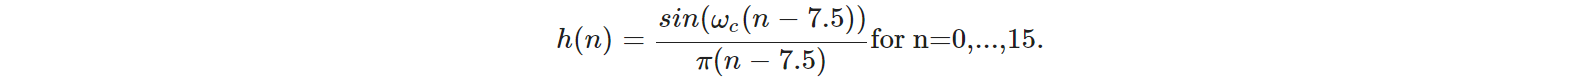

Inilah filter FIR kausal hasilnya dengan fungsi jendela persegi.

Pita lintas memiliki gelombang sekitar +/- 0,5 dB, yang setara dengan sekitar 6% overshoot atau undershoot, yang biasanya dianggap cukup baik.

Namun, perlu diperhatikan bahwa filter ini mungkin memiliki attenuasi sekitar -10 dB pada frekuensi ternormalisasi 0.5⋅π, dan lobe sisi pertama hanya memiliki attenuasi sekitar -20 dB. Oleh karena itu, filter ini tidak memenuhi persyaratan untuk setidaknya attenuasi -60 dB mulai dari frekuensi ternormalisasi 0.5⋅π.

Untuk plot fasa: Kami memiliki tundaan nd=7.5 dengan filter ini. Karena ini adalah filter fase linear, kita harapkan fasa menjadi −7.5⋅ω. Kita dapat memverifikasi ini dalam plot, misalnya pada frekuensi ω=0.1⋅π, dalam plot kita di sumbu x 0.1. Dalam derajat kita dapatkan 7.5⋅0.1⋅π⋅180π=135. Ini adalah yang terlihat dalam plot kita.

Meskipun kita memiliki filter dengan kesalahan kuadrat minimum dibandingkan dengan ideal yang kita berikan, namun apakah ini yang kita inginkan? Masalah yang muncul disebut "Fenomena Gibbs". Ini menyatakan bahwa kesalahan muncul sebagai gelombang pada magnitudo pita lintas dan pita henti. Yang menarik, gelombang pada dekat tepi pita lintas dan pita henti tidak menjadi lebih kecil saat L menjadi lebih besar (kesalahan yang lebih kecil dalam pendekatan), tetapi mereka hanya menjadi lebih sempit! Ini adalah hasil dari konvolusi respon frekuensi ideal kita dengan fungsi sinc dari jendela persegi. Fungsi sinc ini hanya menjadi lebih sempit saat kita meningkatkan panjangnya L, tetapi tinggi gelombangnya tetap sama. Ini berarti, kesalahan maksimum yang kita dapatkan tidak menjadi lebih kecil saat kita meningkatkan L! (yang buruk).

Perhatikan: Ukuran gelombang dekat tepi pita lintas dan pita henti hanya menjadi lebih sempit (sehingga luas yang berkurang dan oleh karena itu kesalahan kuadrat yang berkurang), tetapi tingginya tidak menjadi lebih kecil dengan meningkatnya L. Di sini mereka selalu tetap sekitar 0,1 di pita henti, yang sesuai dengan sekitar -20 dB! (Yang tidak akan mencukupi dalam contoh filter anti-aliasing kita.) Untuk melihat bagaimana Fenomena Gibbs terjadi, kita dapat melihat skema kita dalam domain frekuensi:

Pada dasarnya kita mengalikan respon impuls ideal kita dengan jendela persegi. Dalam domain frekuensi, ini berarti konvolusi dari respon frekuensi ideal (dengan perubahan fase melalui tundaan nd) dengan respon frekuensi dari jendela persegi. Yang terakhir adalah fungsi sinc yang sempit, dengan gelombang yang sesuai di sisi lob utamanya. Dan gelombang-gelombang tersebut adalah yang muncul sebagai Fenomena Gibbs. Jika kita membuat jendela kita lebih panjang (L lebih besar), fungsi sinc menjadi lebih sempit, tetapi tinggi gelombang tidak berkurang, tetapi tetap konstan! Sebenarnya dalam sebagian besar aplikasi, apa yang kita inginkan bukanlah meminimalkan kesalahan kuadrat, tetapi meminimalkan kesalahan maksimum! Pada dasarnya, kita memilih ukuran kesalahan yang salah.

Ini juga menyarankan modifikasi untuk menurunkan tinggi gelombang. Alih-alih menggunakan jendela persegi, kita bisa menggunakan jendela alternatif, yang memiliki gelombang lebih rendah dalam domain frekuensi. Jendela yang umum digunakan adalah jendela cosine raised atau jendela sinus.